<a href="https://colab.research.google.com/github/dubeyshubham786/Twitter-Sentiment-Analysis-NLP/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter Sentiment Analysis**

The objective of this project is find the hate speech in tweets. For simplicity purpose we had consider those tweets which are sexual in nature and racist in nature to be consider as hateful tweets.

By doing this we can find the account of that users who spread hate in the society and leading to many unwanted damages in the form of riots, violent in the society and many more unnecessary things.

The dataset that we are going to work in this project consist of label column containing two values '0' and '1'. The label column containing '1' value are consider to be hateful tweets while the column containing '0' value is consider to be not hateful tweets. So, it is a classification problem and we will be using Logistic Regression as our machine learning model for this project.

## **Loading the required library**

In [131]:
# Importing the required library

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re   # RE is the library for regular expresison used for specifying a set of strings that matches it
import string
import nltk # Natural Language Processing Library
import warnings
warnings.filterwarnings("ignore")

## **Dataset Information**

In [132]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/PROJECTS/Resume Project/Twitter Sentiment Analysis/train_E6oV3lV.csv")

In [134]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [135]:
df.shape

(31962, 3)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## **Preprocessing Data**

In [137]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

Creating a new column called clean_tweets in which we will have all the words present in the tweets except for the words which are starting with the '@' symbol.

In [138]:
# remove twitter handles (@user)

df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [139]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


Once we remove the character starting with '@' now remove the special characters, numbers and punctuations in the tweets. For this we will use the replace function and pandas method.

In [140]:
# remove special characters, numbers and punctuations
# We will replace all the special characters with the space 
# This operation we will do in the clean_tweet column

df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [141]:
# remove short words like is, in, at, on, its, etc, etc.
# for that we need to take only those words in the clean tweet column whose length is greater than 3

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


Till now we have got tweets column which is free from all the unwanted words and symbols. Let's seperate each words in that tweets so that we can check with each and every word present in the tweets whether it is hateful or not.

For that we will create a new variable and assign the lambda function whose main function is to split the words present in the tweets with the help of space.

In [142]:
# individual words considered as tokens
# it will split the words in the form of list of string

tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [143]:
# Now using the stem function from nltk library 
# The reason behind this is that it will narrow down similar words into a single words.
# Example if you have words like fighting, fight, fighter it will narrow it down to a single word fight.

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

# Running this method on tokenized_tweet column
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [144]:
# combine words into single sentence with the help of for loop and join method

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


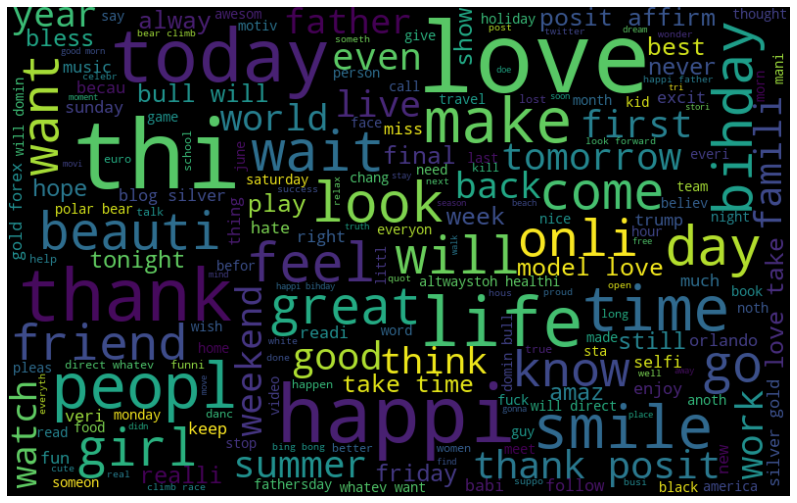

In [145]:
# visualize the frequently occuring words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

# importing wordcloud from wordcloud library function
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Above we have run wordcount for all the words including positive and negative words. So for runnig it for only postive words or for only negative words we will have to give the condition with label column equal to 0 for positive words or with label column equal to 1 for negative words. 

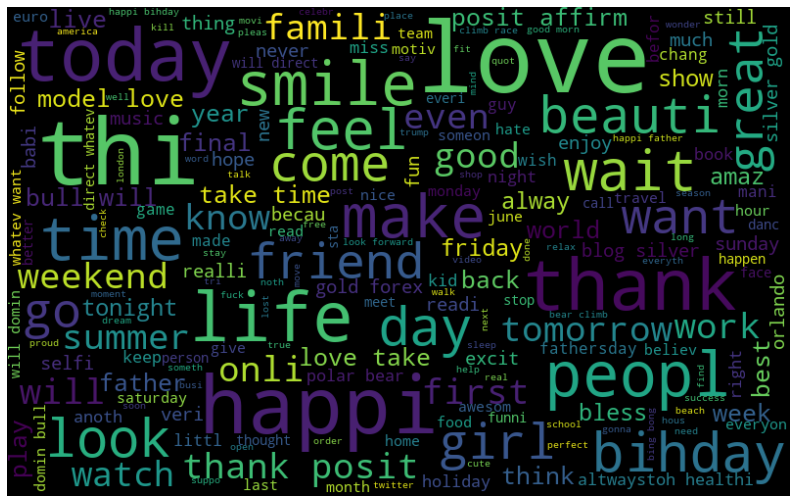

In [146]:
# frequent words visualization for all the positive words
# Assigning the condition to the label column equal to 0 for positive words.
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

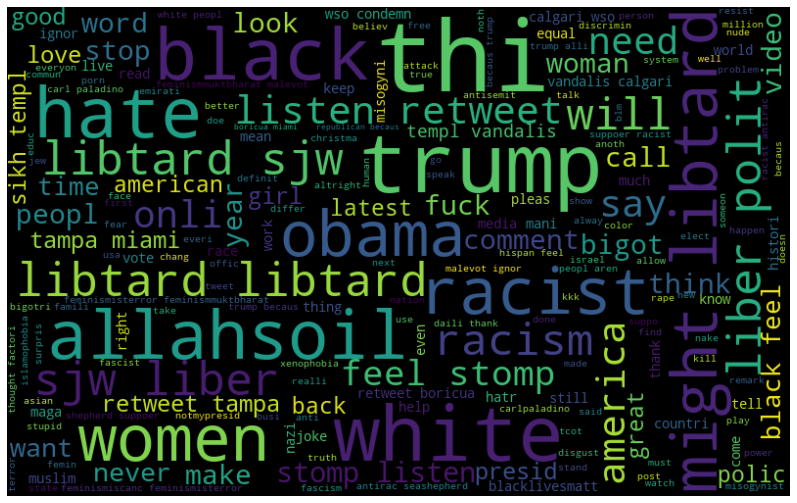

In [147]:
# Similarly we can do it for negative words by just changing the condition to 1

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Now to get to know what a particular tweet is all about we can remove the hashtag from the tweet. This will further give the information about the tweets.

In [148]:
# creating a function for removing the hashtag from the tweets.
# We will do this with the help of findall function of the re library.

def hashtag_extract(tweets):
    hashtags = []

    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet) # giving the pattern of the tweets from which we need to remove hashtag.
        hashtags.append(ht)
    return hashtags   

# this will be in the form of list.

In [149]:
# extract hashtags from non-racist/sexist tweets 
# By giving the condition label to 0

ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
# By giving the condition label to 1.

ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [150]:
# Let's see what's there in the ht_positive tweets
# It will be in the form of list
# To display only the first five we will use the string slicing method.

ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [151]:
ht_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [152]:
# As ht_positive and ht_negative is in the form of list of list
# To combine this into single list we will use the sum function
# Basically we are unnesting the list

ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [153]:
ht_positive[: 5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [154]:
ht_negative[: 5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [155]:
# Now creating a dataframe with the help of FreqDist function of the nltk library
# Here we will create a dataframe containing two column Hashtag and Count on ht_positive library

freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


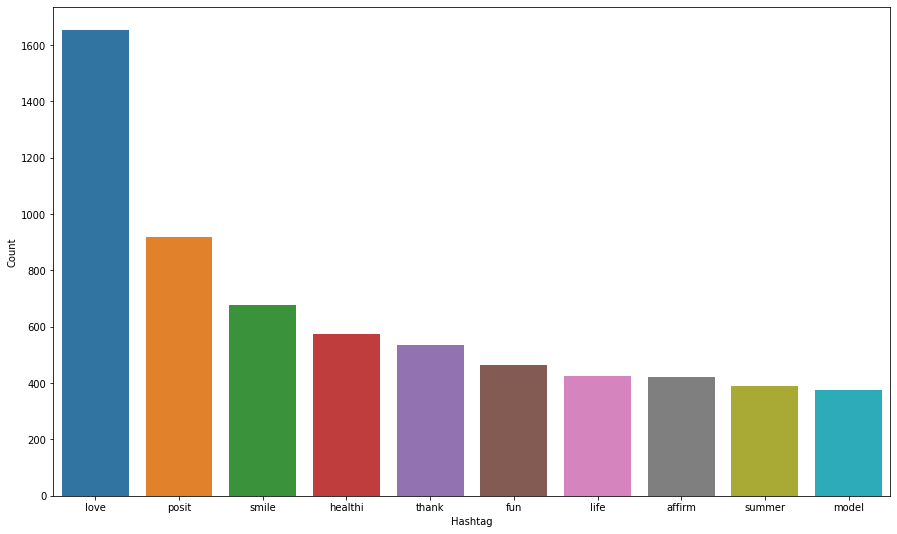

In [156]:
# select top 10 hashtags 

d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [157]:
# Similarly we can create it for negative hashtag 

freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


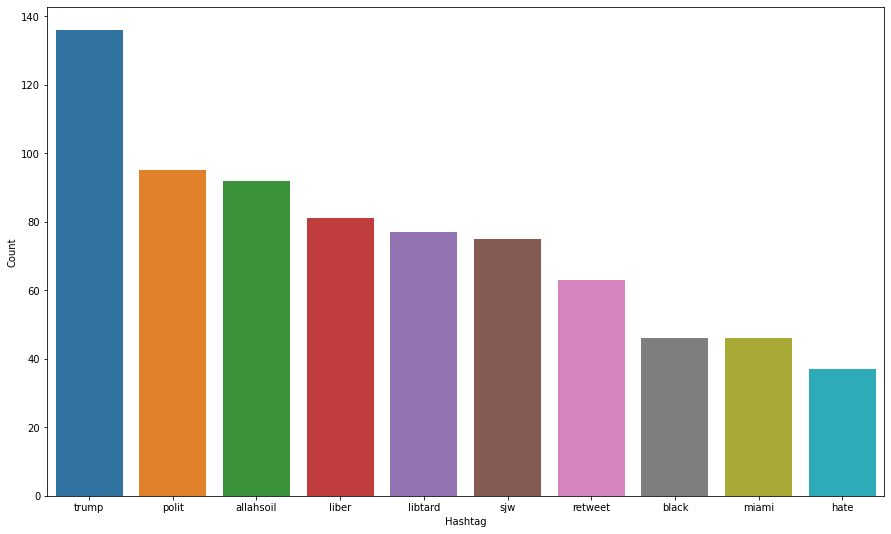

In [158]:
# select top 10 hashtags

d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [159]:
# Now we have a list of words with a string 
# We need to convert this words into vectors or bags of words
#

# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [160]:
# It will give the words present in the first row
# Remember that 0 is for postive words and 1 is for negative words

bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [161]:
# Now importing train test split from sklearn 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

## **Train the Model**

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [163]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [164]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.49763033175355453

In [165]:
# To find the accuracy of the model

accuracy_score(y_test,pred)

0.9469403078463271

## **So we get the accuracy of our machine learning model as 94%.**